# Chemotherapy Resistant Biopsied Exploration
For exploration of chemotherapy resistance in biopsied samples, this Jupyter Notebook provides a playground for analyzing and visualizing the data.

In [1]:
import os
import numpy as np
import pandas as pd
import ast
import glob
from PIL import Image

In [2]:
DATA_DIR = os.path.join('data', 'chemo_res_biop')
RES_DATA = os.path.join(DATA_DIR, 'Resistant')
SEN_DATA = os.path.join(DATA_DIR, 'Sensitive')

RES_FILES = glob.glob(os.path.join(RES_DATA, '*.png'))
SEN_FILES = glob.glob(os.path.join(SEN_DATA, '*.png'))

In [3]:
data = {}

for filetype, files in zip(['res', 'sen'], [RES_FILES, SEN_FILES]):
    patient_numbers = []
    still_image_numbers = []
    lesion_numbers = []
    all_images = []

    for filename in files:
        _, patient_image, region = os.path.basename(filename).split('_')
        patient_number, still_image_number = patient_image.split('.')
        lesion_number, _ = region.split('.')
        
        patient_numbers.append(patient_number)
        still_image_numbers.append(still_image_number)
        lesion_numbers.append(lesion_number)
        
        img = np.array(Image.open(filename))
        
        all_images.append(np.array(Image.open(filename)))

    data[filetype] = pd.DataFrame({'Patient Number': patient_numbers, 'Still Image Number': still_image_numbers, 'Lesion/Region Number': lesion_numbers, 'Image': all_images})

print(data)

{'res':     Patient Number Still Image Number Lesion/Region Number  \
0               75                  3                   10   
1              100                  4                    4   
2               50                  5                    5   
3               50                  5                   10   
4               99                  2                    6   
..             ...                ...                  ...   
365              5                  2                    3   
366              6                  1                    1   
367             73                  3                    1   
368             50                  5                    8   
369            100                  4                    9   

                                                 Image  
0    [[[161, 125, 120], [161, 125, 120], [160, 124,...  
1    [[[199, 153, 182], [200, 154, 183], [195, 150,...  
2    [[[157, 121, 114], [157, 121, 114], [156, 120,...  
3    [[[182, 141, 1

In [4]:
data['res'].describe()

,Patient Number,Still Image Number,Lesion/Region Number,Image
count,370,370,370,370
unique,12,7,10,370
top,100,2,10,"[[[161, 125, 120], [161, 125, 120], [160, 124,..."
freq,60,100,37,1


In `RES_FILES`
* 12 unique patients
* 7 unique still image numbers
* 10 unique region numbers
```python
12 * 7 * 10 = 840 > 370
```

In [5]:
data['sen'].describe()

,Patient Number,Still Image Number,Lesion/Region Number,Image
count,430,430,430,430
unique,15,10,10,430
top,85,1,7,"[[[233, 135, 154], [234, 135, 155], [234, 136,..."
freq,60,110,43,1


In `RES_FILES`
* 15 unique patients
* 10 unique still image numbers
* 10 unique region numbers
```python
15 * 10 * 10 = 1500 > 430
```

In [6]:
res_images = data['res']['Image']
sen_images = data['sen']['Image']

In [7]:
import matplotlib.pyplot as plt

def create_histogram(images, title='Pixel Value Histogram'):
    # Flatten the images to 1D arrays
    flattened_images = [image.flatten() for image in images]

    # Concatenate the flattened arrays into a single 1D array
    all_pixels = np.concatenate(flattened_images)

    # Create a histogram
    plt.hist(all_pixels, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)

    # Set plot labels and title
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)

    # Show the plot
    plt.show()

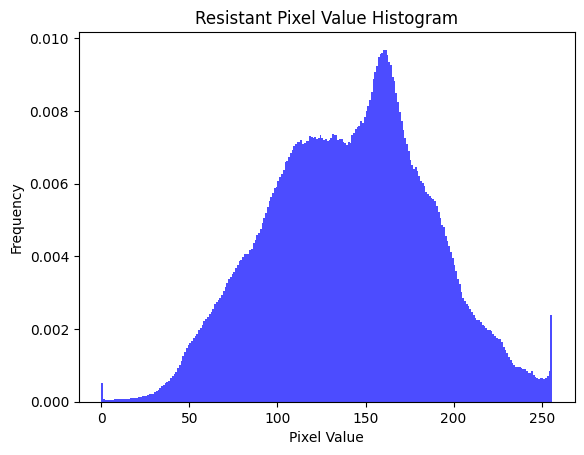

In [8]:
create_histogram(res_images, 'Resistant Pixel Value Histogram')

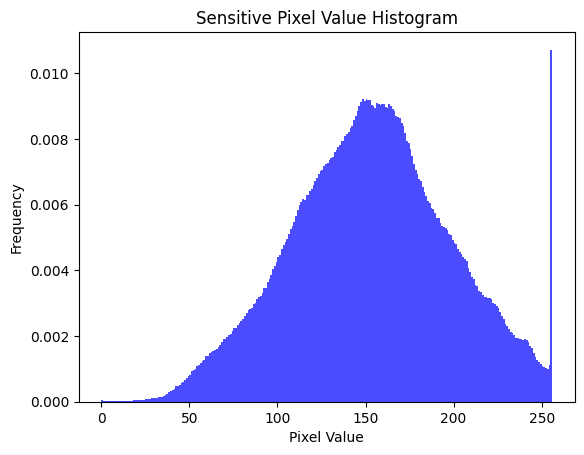

In [9]:
create_histogram(sen_images, 'Sensitive Pixel Value Histogram')